<link href="https://fonts.googleapis.com/css2?family=Barlow:wght@300&display=swap" rel="stylesheet">
<div style="font-family:'Barlow';font-size:18px;">
<h1>SB - Property Sales</h1> 
<h2>Exploratory Data Analysis</h2>
</div>

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd 
import numpy as np  
import seaborn as sns 
import re
import matplotlib.pyplot as plt 
# Folium Map 
import folium
import branca.colormap as cmp
# Stat 
from scipy import stats
from scipy.stats import skew, boxcox_normmax, norm
from scipy.special import boxcox1p
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

In [3]:
pd.set_option("display.precision", 3)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 
sns.set_context('talk')
sns.set_style('darkgrid', {'font.sans-serif': ['Iosevka']})

In [4]:
print(f"Pandas ver.: {pd.__version__}")
print(f"Numpy ver.: {np.__version__}")
print(f"Seaborn ver.: {sns.__version__}")
print(f"Folium ver.: {folium.__version__}")

Pandas ver.: 1.1.0
Numpy ver.: 1.19.1
Seaborn ver.: 0.10.1
Folium ver.: 0.11.0


In [5]:
# Global variable 
datafile = 'datasets/COMP_SALE_SB_CLEAN_20201104.csv'

### Dataset summary

In [6]:
def load_dataset(filename, na_val=None, parse_date=False):
    if parse_date:
        to_parse = ['CREATION_DATE','YEAR_BUILD', 'DATE_OF_SALE']
        df = pd.read_csv(filename, parse_dates=to_parse, na_values=na_val)
    else:
        df = pd.read_csv(filename, na_values=na_val)
    
    features = df.columns
    target = "SOLD_PRICE"
    
    print("+ Dataset:")
    display(df.head(3))
    print("+ Shape:")
    display(df.shape) 
    print(f"+ Target: {target}")
    print(f"+ Overall Variables Info: ")
    display(pd.DataFrame(df.info(memory_usage='deep')))
    
    return features, target, df

features, target, dataset = load_dataset(datafile, na_val=None, parse_date=False)

+ Dataset:


ADDRESS  LATITUDE  LONGITUDE  \
0  431-433 12e Avenue N. Sherbrooke (Fleurimont) ...   45.4506   -71.8607   
1      118 5e Avenue Sherbrooke (Fleurimont) J1G 2L5   45.4037   -71.8777   
2    502 Rue King E. Sherbrooke (Fleurimont) J1G 1B5   45.4079   -71.8777   

   SOLD_PRICE  UNIT_NUMBER  PROPERTY_FLOOR  LOT_EVALUATION  \
0      125000            2               2           71100   
1      369000            2               0           75100   
2      340000            6               3          104500   

   BUILDING_EVALUATION  RESIDENTIAL_REVENUE  COMMERCIAL_REVENUE  \
0                98400                15600                   0   
1               206200                    1                   0   
2               225300                28452                   0   

   PARKING_REVENUE  OTHERS_REVENUE  MUNICIPAL_TAXE  SCHOOL_TAXE  \
0                0               0            2386          267   
1                0               0            3476          803   
2                0               0            5164          562   

   EXPENSES_SNOW                         HEATING_ENERGY  NUMBER_1_H  \
0              0                     Electricity, Other           0   
1              0  Dual energy, Electricity, Heating oil           0   
2            500                            Electricity           0   

   NUMBER_2_H  NUMBER_3_H  NUMBER_4_H  NUMBER_5_H  NUMBER_6_H  NUMBER_7_H  \
0           0           0           0           2           0           0   
1           0           0           0           0           0           1   
2           0           6           0           0           0           0   

   NUMBER_8_H  NUMBER_9_H                AGENCY_NAME  DISTANCE  \
0           0           0        RE/MAX D'ABORD INC.    9.0569   
1           0           0  CENTURY 21 ACTIONWEB INC.    4.8913   
2           0           0        Via Capitale Estrie    5.0672   

   REVENUE_GROSS_ROUND  NORM_EXP_HEAT  NORM_EXP_VACANCY  NORM_EXP_INSURANCE  \
0                16000              0          468.0000                1300   
1                    0              0            0.0300                1300   
2                28000              0          853.5600                1426   

   NORM_EXP_CONCIERGE  NORM_EXP_MANAGEMENT  NORM_EXP_ELECTRICITY  \
0                 600             780.0000                     0   
1                 600               0.0500                  4694   
2                 750             853.5600                   371   

   TOTAL_NORM_EXP_ROUNDED  NET_NORM_INCOME  CAP_RATE  \
0               4400.0000       11179.0000    8.9400   
1                  0.0000           1.0000    0.0000   
2              13000.0000       15471.8800    4.5500   

   GROSS_REVENUE_MULTIPLICATOR  UNIT_PRICE  NET_REVENUE_MULTIPLICATOR  \
0                       8.0100  62500.0000                    11.1800   
1                  369000.0000 184500.0000                369000.0000   
2                      11.9500  56666.6700                    21.9800   

   BUILDING_SURFACE_SQFT  LOT_SURFACE_SQFT  FONDATION_QUAL  AGE_EVALUATION  \
0              1047.6000         6124.6600          6.0000         62.0000   
1              1630.0000         6476.0000          8.0000         69.0000   
2              1234.4000         4500.3900          8.0000         46.0000   

   NORM_SOLD_DURATION  
0             13.0000  
1             11.0000  
2              3.0000

+ Shape:


(1500, 45)

+ Target: SOLD_PRICE
+ Overall Variables Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ADDRESS                      1500 non-null   object 
 1   LATITUDE                     1500 non-null   float64
 2   LONGITUDE                    1500 non-null   float64
 3   SOLD_PRICE                   1500 non-null   int64  
 4   UNIT_NUMBER                  1500 non-null   int64  
 5   PROPERTY_FLOOR               1500 non-null   int64  
 6   LOT_EVALUATION               1500 non-null   int64  
 7   BUILDING_EVALUATION          1500 non-null   int64  
 8   RESIDENTIAL_REVENUE          1500 non-null   int64  
 9   COMMERCIAL_REVENUE           1500 non-null   int64  
 10  PARKING_REVENUE              1500 non-null   int64  
 11  OTHERS_REVENUE               1500 non-null   int64  
 12  MUNICIPAL_TAXE              

Empty DataFrame
Columns: []
Index: []

### Missing data summary 

In [14]:
def display_missing(dataset, features, verbose=False):
    if verbose:
        print("+ Missing data: ")
    missing_count = dataset[features].isnull().sum()
    missing_percent = (dataset[features].isnull().sum() / len(dataset) * 100).round(4)
    missing = pd.DataFrame({'feature': features, 'count': missing_count, 'percent': missing_percent,})
    missing.sort_values('count', ascending=False, inplace=True)
    missing.reset_index(drop=True, inplace=True)
    return missing.head(7)

display_missing(dataset, features, True)

+ Missing data: 


feature  count  percent
0        BUILDING_SURFACE_SQFT    397  26.4667
1               AGE_EVALUATION    246  16.4000
2               FONDATION_QUAL    227  15.1333
3               HEATING_ENERGY    172  11.4667
4             LOT_SURFACE_SQFT     38   2.5333
5  GROSS_REVENUE_MULTIPLICATOR      9   0.6000
6                      ADDRESS      0   0.0000

### Statistics summary 

In [15]:
def display_stats(df):
    print(f"\n+ Statistics: ")
    display(df.describe())

display_stats(dataset)


+ Statistics: 


LATITUDE  LONGITUDE   SOLD_PRICE  UNIT_NUMBER  PROPERTY_FLOOR  \
count 1500.0000  1500.0000    1500.0000    1500.0000       1500.0000   
mean    45.3828   -71.9268  337628.4307       4.3840          1.1973   
std      0.0640     0.1065  378039.1618       6.3457          5.6544   
min     45.1321   -72.3050   15000.0000       0.0000          0.0000   
25%     45.3740   -71.9526  180375.0000       2.0000          0.0000   
50%     45.3931   -71.8971  240000.0000       3.0000          0.0000   
75%     45.4081   -71.8780  365000.0000       4.0000          2.0000   
max     45.6431   -71.5645 6000000.0000      99.0000        215.0000   

       LOT_EVALUATION  BUILDING_EVALUATION  RESIDENTIAL_REVENUE  \
count       1500.0000            1500.0000            1500.0000   
mean       67378.9193          259108.0693           31658.7327   
std        53601.7572          312619.8193           64287.2655   
min            0.0000               0.0000               0.0000   
25%        39500.0000          138850.0000           14805.0000   
50%        58100.0000          182450.0000           20430.0000   
75%        80425.0000          274950.0000           33072.0000   
max       878200.0000         5460200.0000         1462032.0000   

       COMMERCIAL_REVENUE  PARKING_REVENUE  OTHERS_REVENUE  MUNICIPAL_TAXE  \
count           1500.0000        1500.0000       1500.0000       1500.0000   
mean             802.0620          31.0087         31.0087       4706.0427   
std             4833.4477         369.0235        369.0235       5066.7301   
min                0.0000           0.0000          0.0000          0.0000   
25%                0.0000           0.0000          0.0000       2656.0000   
50%                0.0000           0.0000          0.0000       3368.0000   
75%                0.0000           0.0000          0.0000       4993.2500   
max            64368.0000       10200.0000      10200.0000      82492.0000   

       SCHOOL_TAXE  EXPENSES_SNOW  NUMBER_1_H  NUMBER_2_H  NUMBER_3_H  \
count    1500.0000      1500.0000   1500.0000   1500.0000   1500.0000   
mean      726.1873       199.5533      0.2520      0.1720      0.7653   
std       799.1192       374.3123      3.3280      0.9318      1.7612   
min         0.0000         0.0000      0.0000      0.0000      0.0000   
25%       377.0000         0.0000      0.0000      0.0000      0.0000   
50%       541.5000         0.0000      0.0000      0.0000      0.0000   
75%       792.2500       400.0000      0.0000      0.0000      1.0000   
max     11885.0000      3500.0000     89.0000     22.0000     18.0000   

       NUMBER_4_H  NUMBER_5_H  NUMBER_6_H  NUMBER_7_H  NUMBER_8_H  NUMBER_9_H  \
count   1500.0000   1500.0000   1500.0000   1500.0000   1500.0000   1500.0000   
mean       1.5040      0.9267      0.1873      0.1047      0.0753      0.0440   
std        2.7644      2.0169      0.4876      0.3509      0.3105      0.2178   
min        0.0000      0.0000      0.0000      0.0000      0.0000      0.0000   
25%        0.0000      0.0000      0.0000      0.0000      0.0000      0.0000   
50%        1.0000      0.0000      0.0000      0.0000      0.0000      0.0000   
75%        2.0000      1.0000      0.0000      0.0000      0.0000      0.0000   
max       38.0000     42.0000      4.0000      4.0000      4.0000      2.0000   

       DISTANCE  REVENUE_GROSS_ROUND  NORM_EXP_HEAT  NORM_EXP_VACANCY  \
count 1500.0000            1500.0000      1500.0000         1500.0000   
mean     8.0391           32519.3333       632.6407          975.6844   
std      7.4941           64488.2169      2611.4281         1934.6171   
min      0.0580               0.0000         0.0000            0.0000   
25%      3.3066           15000.0000         0.0000          451.3500   
50%      4.8559           21000.0000         0.0000          631.8000   
75%      9.0569           34000.0000         0.0000         1009.5300   
max     29.9918         1462000.0000     55750.0000        43860.9600   

     

### Distribution of the target variable `SOLD_PRICE`
- The distribution of the dependent variable would help in segmenting region on the map. Moreover, It 
###  Summary 
- From the SOLD PRICE DIST, we can notice that this feature is right skewed and there is a presence of extreme values which can be taken as outliers.
- We can also notice the very large deviation between the Q3 and the max value. 

In [16]:
def plot_target_dist(df, feature, title):
    # Grid plot:
    fig = plt.figure(constrained_layout=True, figsize=(12, 5))
    grid = gridspec.GridSpec(ncols=4, nrows=3, figure=fig, hspace=0.4, wspace=0)
    
    # Histogram:
    hist_ax = fig.add_subplot(grid[:, :2])
    sns.distplot(df.loc[:, feature], 
                 hist=True,
                 kde=True,
                 fit=norm,
                 ax=hist_ax,
                 color='#e74c3c')
    hist_ax.legend(labels=['Normal', 'Actual'])
    hist_ax.set_title('')
    hist_ax.set_xlabel(target)
    hist_ax.set_ylabel('KDE')

    # Box Plot:
    bx_ax = fig.add_subplot(grid[:, 3])
    sns.boxplot(df.loc[:, feature], orient='v', ax=bx_ax, color='#e74c3c')
    bx_ax.set_title('')
    bx_ax.set_ylabel(target)
    bx_ax.set_xlabel('')
    bx_ax.yaxis.set_major_locator(MaxNLocator(nbins=10))

    plt.suptitle(f'{title}', fontsize=20)
    

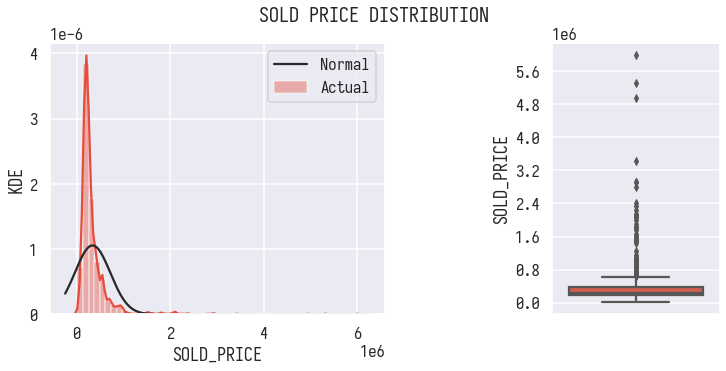

In [17]:
# Plot purchased price 
plot_target_dist(dataset, target, 'Sold Price distribution'.upper())

### Plot `SOLD_PRICE` distribution on Map  
- In the following, we will segment the `SOLD_PRICE` plotted on the Map into different categories. This will help us to find any pattern on the location of the more/less expensive properties: 

In [18]:
def h_comma(amount):
    """Helper to split price amount by comma"""
    orig = amount
    new = re.sub("^(-?\d+)(\d{3})", '\g<1>,\g<2>', amount)
    if orig == new:
        return new
    else:
        return h_comma(new)

In [48]:
# Center point: Lat, Long 
lat_center = (dataset['LATITUDE'].max() + dataset['LATITUDE'].min()) / 2
lon_center = (dataset['LONGITUDE'].max() + dataset['LONGITUDE'].min()) / 2
center_coord = (lat_center, lon_center)

m = 1_000_000

latitude = dataset['LATITUDE']
longitude = dataset['LONGITUDE']
sold_price = dataset['SOLD_PRICE'] / m
address = dataset['ADDRESS']
units = dataset['UNIT_NUMBER']

price_map = folium.Map(
    location=center_coord,
    zoom_start=11
)

linear_cmap = cmp.LinearColormap(
    ['green', 'yellow', 'orange', 'red'],
    vmin=sold_price.min(), vmax=sold_price.max(),
).to_step(
    n=10,
    round_method='float',
)
linear_cmap.caption = 'SOLD PRICE(in Million CAD)'


for lat, lon, price, addr, unit in zip(latitude, longitude, sold_price, address, units):
    _ = folium.CircleMarker(
        location = [lat, lon],
        color=linear_cmap(price),
        fill=True,
        fill_opacity=1,
        radius = price * 12 if price < 1 else price * 1.5,
        tooltip = ('Address: ' + str(addr) + '<br>'
                   'Price: ' + h_comma(str(price * m)) + '<br>'
                   'No. of unit: ' + str(unit) + '<br>'
                  ),
    ).add_to(price_map)

# Update & Display Map - 
# hover: Sold Price(in Million)
_ = price_map.add_child(linear_cmap)

price_map

### Plot `AGE_EVALUATION` distribution on Map  
- The following plot will show the distribution of the location of the oldest and newest properties 


In [39]:
# Center point: Lat, Long 
lat_start = (dataset['LATITUDE'].max() + dataset['LATITUDE'].min()) / 2
lon_start = (dataset['LONGITUDE'].max() + dataset['LONGITUDE'].min()) / 2
start_coord = (lat_start, lon_start)

latitude = dataset['LATITUDE']
longitude = dataset['LONGITUDE']
age_eval = dataset[dataset["AGE_EVALUATION"].notnull()]["AGE_EVALUATION"]
address = dataset['ADDRESS']
units = dataset['UNIT_NUMBER']

age_map = folium.Map(
    location=start_coord, # Lat, Long 
    zoom_start=11
)

linear_cmap = cmp.LinearColormap(
    ['darkblue', 'lime', 'red'],
    vmin=age_eval.min(), vmax=age_eval.max(),
).to_step(
    n=10,
    round_method='float',
)
linear_cmap.caption = 'PROPERTY AGE(in Years)'


for lat, lon, age, addr, unit in zip(latitude, longitude, age_eval, address, units):
    _ = folium.CircleMarker(
        location = [lat, lon],
        color=linear_cmap(age),
        fill=True,
        fill_opacity=1,
        radius = 5,
        tooltip = ('Address: ' + str(addr) + '<br>'
                   'Age of the property: ' + str(age) + 'years <br>'
                   'No. of unit: ' + str(unit) + '<br>'
                  ),
    ).add_to(age_map)

# Update & Display Map - 
# hover: Sold Price(in Million)
_ = age_map.add_child(linear_cmap)

age_map

### Plot `NORM_SOLD_DURATION` distribution on Map  
- The following plot shows the location of the properties selling duration.

In [46]:
# Center point: Lat, Long 
lat_start = (dataset['LATITUDE'].max() + dataset['LATITUDE'].min()) / 2
lon_start = (dataset['LONGITUDE'].max() + dataset['LONGITUDE'].min()) / 2
start_coord = (lat_start, lon_start)

latitude = dataset['LATITUDE']
longitude = dataset['LONGITUDE']
sold_duration = dataset["NORM_SOLD_DURATION"]
address = dataset['ADDRESS']
units = dataset['UNIT_NUMBER']

sold_duration_map = folium.Map(
    location=start_coord, # Lat, Long 
    zoom_start=11
)

linear_cmap = cmp.LinearColormap(
    ['coral', 'steelblue', 'red'],
    vmin=sold_duration.min(), vmax=sold_duration.max(),
).to_step(
    n=5,
    round_method='float',
)
linear_cmap.caption = 'NORMALIZED SOLD DURATION(in Months)'


for lat, lon, duration, addr, unit in zip(latitude, longitude, sold_duration, address, units):
    _ = folium.CircleMarker(
        location = [lat, lon],
        color=linear_cmap(duration),
        fill=True,
        fill_opacity=1,
        radius = 5,
        tooltip = ('Address: ' + str(addr) + '<br>'
                   'Sold duration: ' + str(duration) + ' months<br>'
                   'No. of unit: ' + str(unit) + '<br>'
                  ),
    ).add_to(sold_duration_map)

# Update & Display Map - 
# hover: Sold Price(in Million)
_ = sold_duration_map.add_child(linear_cmap)

sold_duration_map

### Target Analysis & Enginnering  

In [54]:
def plot_dist(df, feature, title):
    # Grid plot:
    fig = plt.figure(constrained_layout=True, figsize=(16, 10))
    grid = gridspec.GridSpec(ncols=4, nrows=3, figure=fig, hspace=0.4, wspace=0)
    
    # Histogram:
    hist_ax = fig.add_subplot(grid[:2, :2])
    sns.distplot(df.loc[:, feature], 
                 hist=True,
                 kde=True,
                 fit=norm,
                 ax=hist_ax,
                 color='#e74c3c')
    hist_ax.legend(labels=['Normal', 'Actual'])
    hist_ax.set_title('')
    hist_ax.set_xlabel(target)
    hist_ax.set_ylabel('KDE')

    # QQ_plot:
    qq_ax = fig.add_subplot(grid[2:, :2])
    stats.probplot(df.loc[:, feature].fillna(np.mean(df.loc[:, feature])), plot=qq_ax)
    qq_ax.get_lines()[0].set_markerfacecolor('#e74c3c')
    qq_ax.get_lines()[0].set_markersize(12.0)
    qq_ax.set_title('')
    qq_ax.set_xlabel('THEORETICAL QUANTILES')
    qq_ax.set_ylabel(target)
    
    # Box Plot:
    bx_ax = fig.add_subplot(grid[:, 3])
    sns.boxplot(df.loc[:, feature], orient='v', ax=bx_ax, color='#e74c3c')
    bx_ax.set_title('')
    bx_ax.set_ylabel(target)
    bx_ax.set_xlabel('')
    bx_ax.yaxis.set_major_locator(MaxNLocator(nbins=10))

    plt.suptitle(f'{title}', fontsize=20)

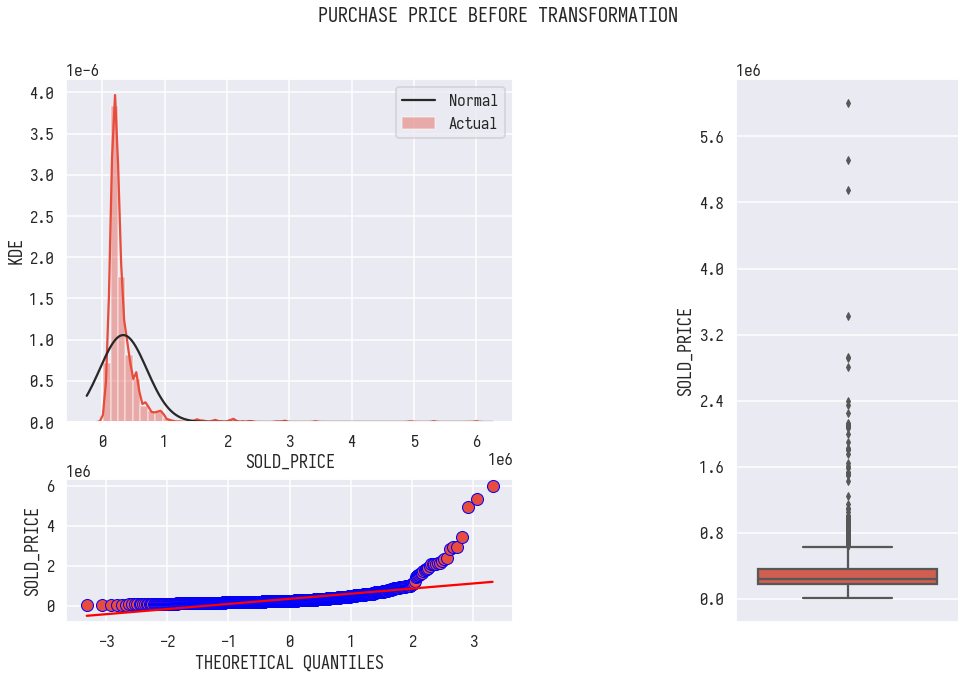

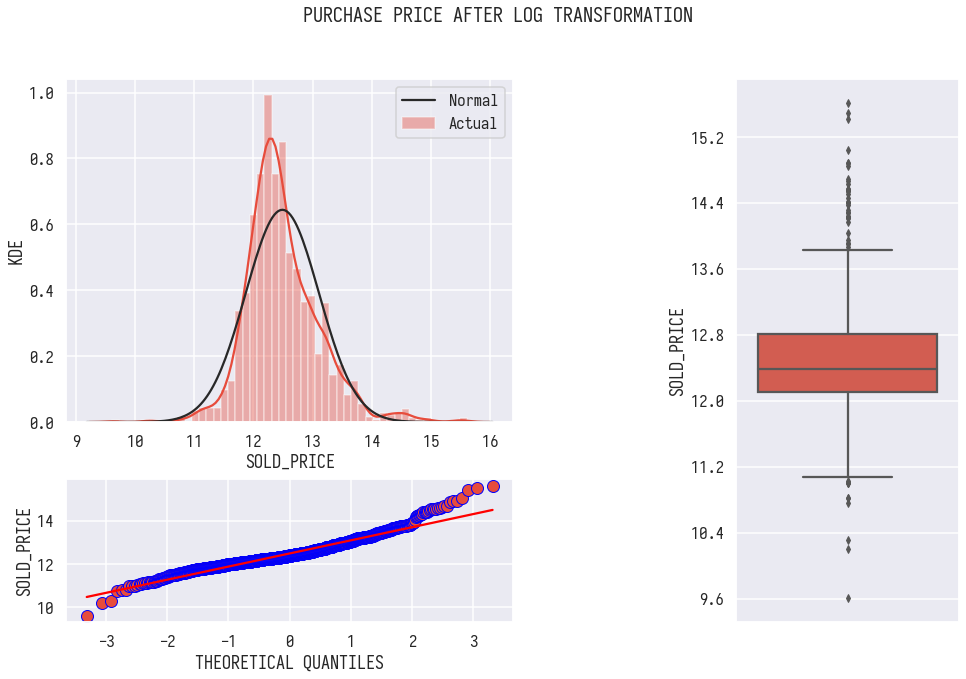

In [55]:
# Plot purchased price 
plot_dist(dataset, target, 'Purchase Price before transformation'.upper())

# Plot log purchased price 
y = np.log1p(dataset[target])
dataset["LOG_PRICE_P"] = np.log1p(dataset[target])
plot_dist(dataset, 'LOG_PRICE_P', 'Purchase Price after Log transformation'.upper())


## Feature Engineering   

- Before going further, we are first interested in the way how can we impute the missing data in YEAR_BUILD. We can approach creating a new feature BUILD_AGE which refers to the age of the property then impute missing value using different imputer algorithms. Then we will evaluate the model and observe the effects of the imputation techniques by comparing their performance using RandomForest.  
- Prior to that as we are going to use the evaluation model, we may need to prepare our features. It is essential to know the features distribution to see if there are outliers or they may be skewed, etc..
- To avoid Data Leakage, it is preferably separate the Train and Test sets and the following transformation will be first applied to the Train set.  

In [14]:
# Get build age from year build 
dataset["BUILD_AGE"] = dataset["YEAR_BUILD"].apply(lambda x: (2020 - x) if x > 0 else x)

# Get sale age from date of sale 
sale_age = dataset["DATE_OF_SALE"].apply(lambda x: int(x.split('-')[0]))
dataset["SALE_AGE"] = sale_age.apply(lambda x: (2020 - x) if int(x) > 0 else x)

# Summary
dataset.agg({'BUILD_AGE': ['min', 'max', 'median'],
            'SALE_AGE': ['min', 'max', 'median']})

BUILD_AGE  SALE_AGE
min         2.000     0.000
max       141.000     4.000
median     60.000     1.000

In [15]:
from sklearn.model_selection import train_test_split

unused_feats = ['id', 'CREATION_DATE', 'PURCHASE_PRICE', 'ADDRESSES_FULL', 'LATITUDE', 'LONGITUDE', 'YEAR_BUILD', 'DATE_OF_SALE'] 
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(unused_feats, axis=1), 
                                                    dataset[target], 
                                                    test_size=.2, 
                                                    random_state=42)

# Double check the proportion of missing values 
print(f"+ Missing summary in X_train {X_train.shape}: ")
display_missing(X_train, X_train.columns, verbose=False).head(3)

print(f"+ Missing summary in X_test {X_test.shape}:")
display_missing(X_test, X_test.columns, verbose=False).head(3)

# Train data summary 
print(f"+ Train data summary:")
X_train.head(3)
# Get features in use 
train_feats = X_train.columns 

+ Missing summary in X_train (484, 11): 


feature  count  percent
0             BUILD_AGE     61   12.603
1           UNIT_NUMBER      0    0.000
2  REVENU_GROSS_ROUNDED      0    0.000

+ Missing summary in X_test (121, 11):


feature  count  percent
0             BUILD_AGE     12    9.917
1           UNIT_NUMBER      0    0.000
2  REVENU_GROSS_ROUNDED      0    0.000

+ Train data summary:


UNIT_NUMBER  REVENU_GROSS_ROUNDED  NORMALYZED_EXPENSES_ROUNDED  CAP_RATE  \
235            4                 42000                        14900     4.690   
9              2                 21000                        12000     3.890   
227            5                 27000                        10400     8.620   

     PRICE_PER_UNIT  GROSS_REVENUE_MULTIPLICATOR  NET_REVENUE_MULTIPLICATOR  \
235      145000.000                       13.770                     21.330   
9        117500.000                       11.130                     25.730   
227       39400.000                        7.200                     11.600   

     DISTANCE  LOG_PRICE_P  BUILD_AGE  SALE_AGE  
235     3.932       13.271     13.000         1  
9       0.683       12.367     59.000         3  
227     3.826       12.191     74.000         1

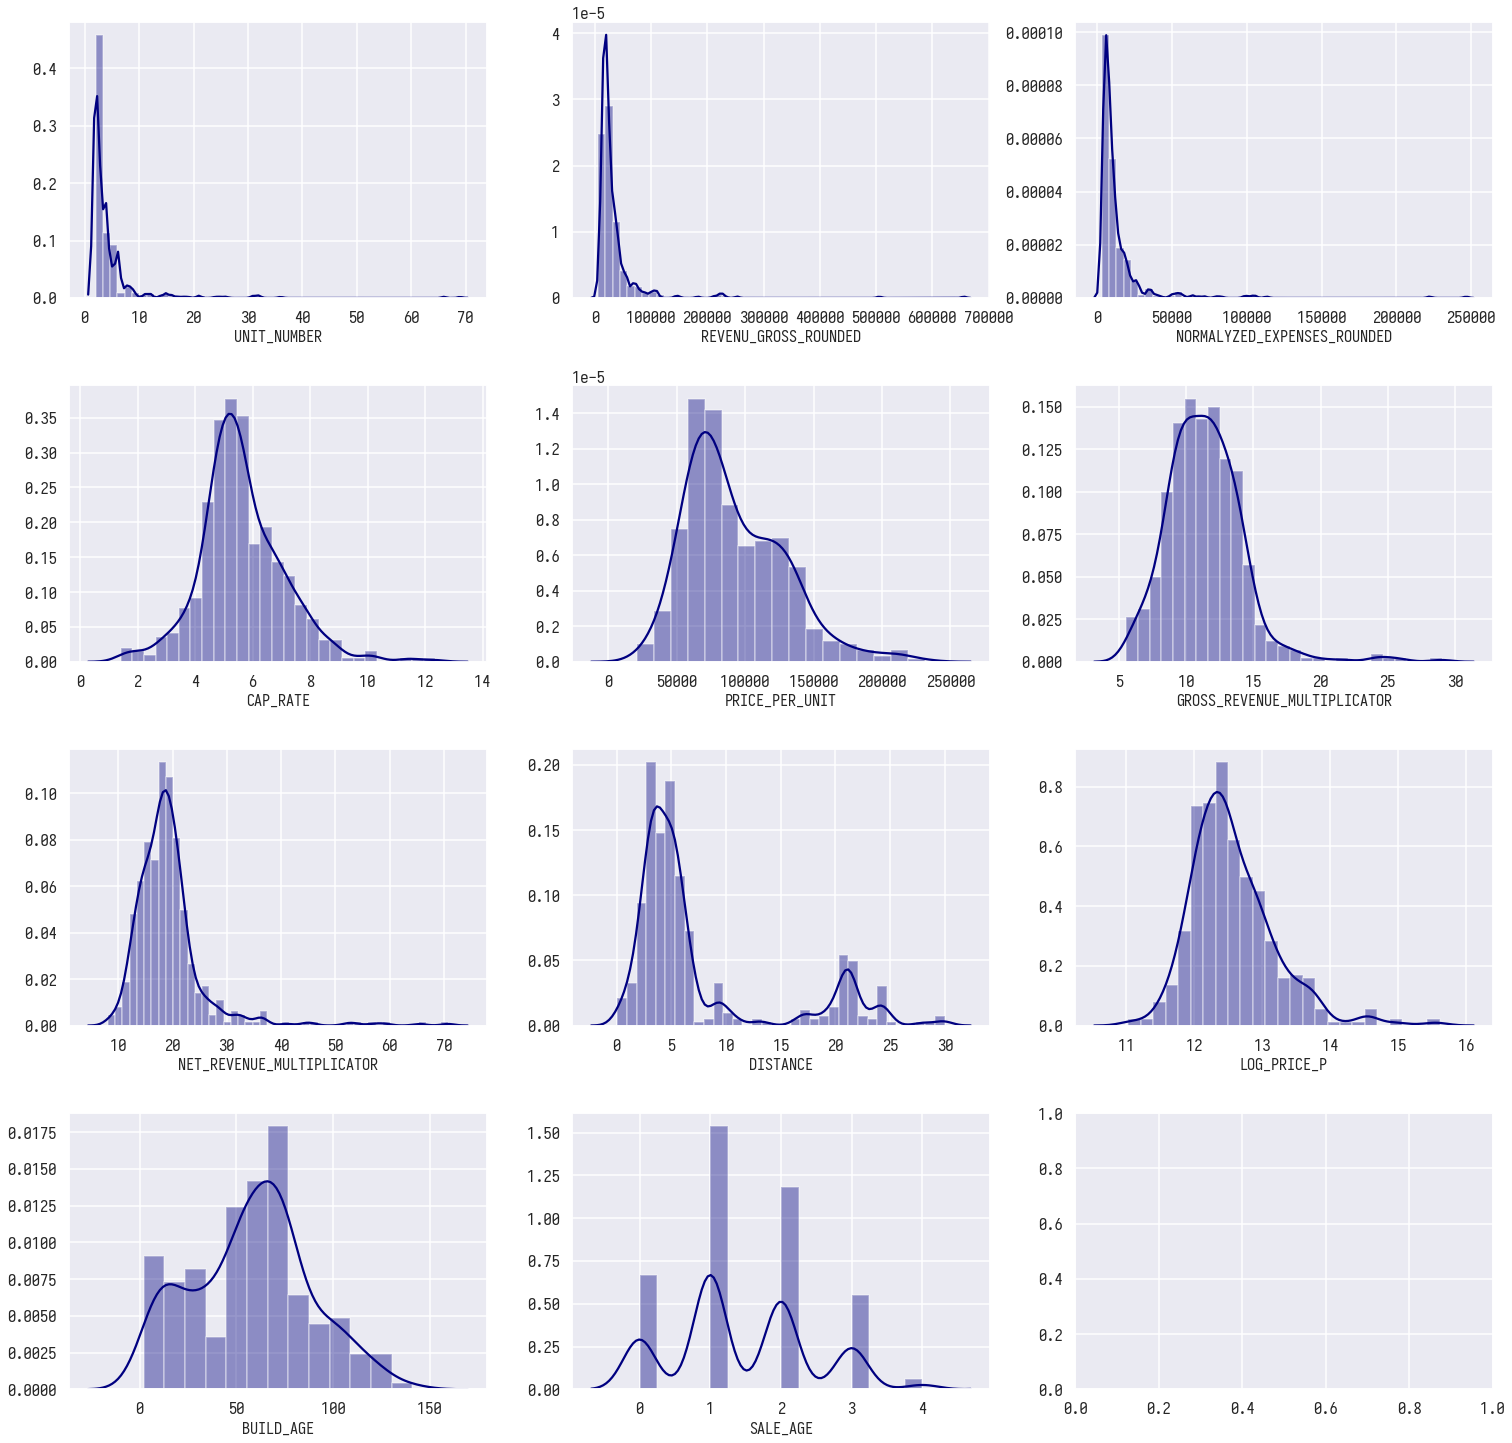

In [16]:
def visualize_dist(df):
    num_cols = df.columns
    cols = 3
    rows = (len(num_cols) // cols) 
    if (len(num_cols) % cols) != 0:
        rows += 1
    fig, axis = plt.subplots(rows, cols, figsize=(7*cols, 5*rows))
    fig.tight_layout(w_pad=2, h_pad=3) 
    for i, col in enumerate(num_cols):
        row = i // cols
        pos = i % cols
        _ = sns.distplot(df[col], ax=axis[row][pos], kde=True, color='navy')
        _ = axis[row][pos].set_title('')
        _ = axis[row][pos].set_xlabel(f'{col}', fontdict={'size': 16})
        _ = axis[row][pos].set_ylabel('')
    plt.show()
    
visualize_dist(X_train)

### Feature Transformation 
- From the distribution, we can spot the presence of outliers in 'UNIT_NUMBER', 'REVENU_GROSS_ROUNDED', 'NORMALYZED_EXPENSES_ROUNDED', 'NET_REVENUE_MULTIPLICATOR', and 'DISTANCE'. In addition to outliers, these features are skewed.  As we do not have enough data and we do not have negative data in these features, we will keep the data as it is and try to apply Log tranformation to address the problem of outliers as well as the skeweness. Finally we will evaluate the effects of the imputation algorithm on the prepared dataset. 
###  Summary 
- We can notice changes in the distribution of the features out of the following plots though we only applied log transformation. Therefore, we can later apply the same transformation in the upcoming pipeline.

In [18]:
def visualize_transform(df, col, transformer):
    fig, axis = plt.subplots(1, 2, figsize=(12, 4))
    fig.tight_layout(w_pad=2, h_pad=10) 

    _ = sns.distplot(df[col], ax=axis[0], kde=True, color='navy')
    axis[0].set_title('Before ' + str(transformer).split('(')[0])
    axis[0].set_xlabel(f'{col}')
    
    trans_col = transformer.fit_transform(df[col])
    _ = sns.distplot(trans_col, ax=axis[1], kde=True, color='navy')
    axis[1].set_title('After ' + str(transformer).split('(')[0])
    axis[1].set_xlabel(f'{col}')
    

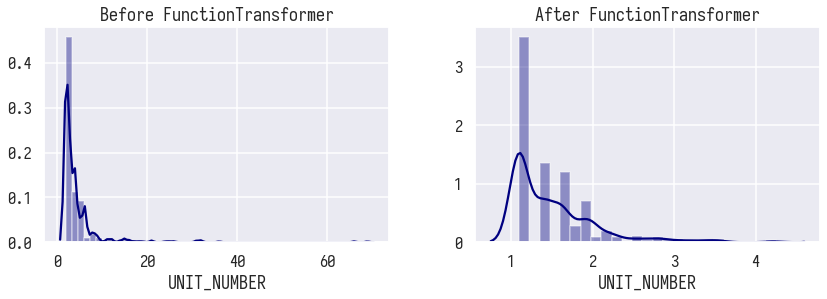

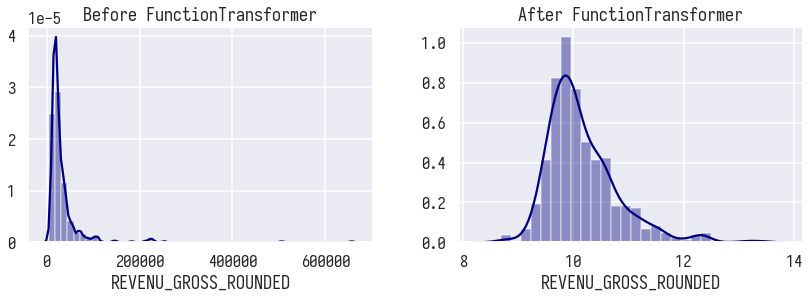

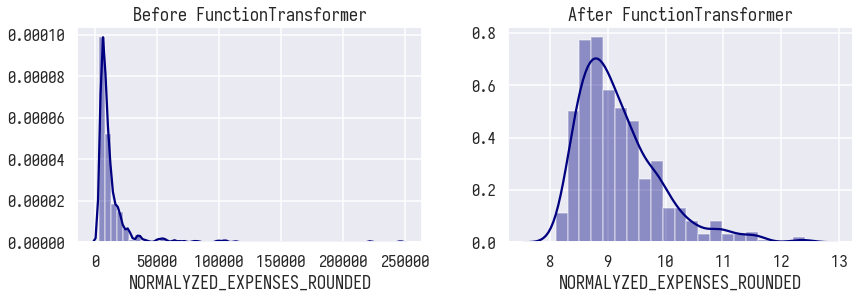

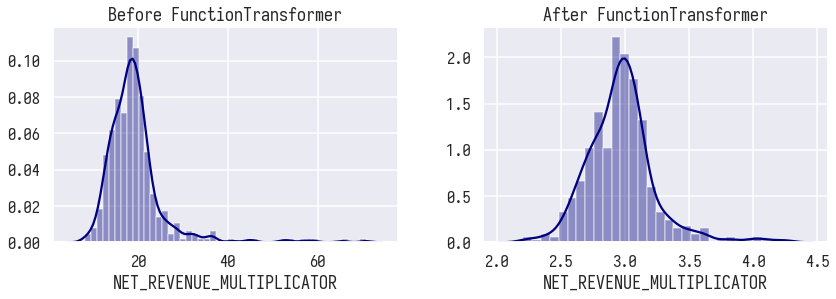

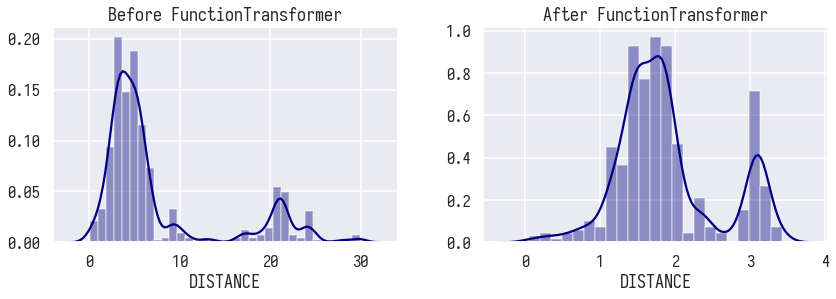

In [19]:
from sklearn.preprocessing import FunctionTransformer

# Select columns that need transformation  
log_tranform_cols = ['UNIT_NUMBER', 'REVENU_GROSS_ROUNDED', 'NORMALYZED_EXPENSES_ROUNDED', 'NET_REVENUE_MULTIPLICATOR', 'DISTANCE']

# Using log tranformation 
for col in log_tranform_cols:
    visualize_transform(X_train, col, FunctionTransformer(lambda x: np.log1p(x)))

In [31]:
# Various Helper libs 
import sklearn as sk
from sklearn.model_selection import (train_test_split, cross_validate, 
                                     GridSearchCV, KFold, cross_val_score)
# Processor libs 
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.base import BaseEstimator, TransformerMixin
# Imputer libs
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
# Model libs 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
# Metrics 
from sklearn.metrics import make_scorer, r2_score, mean_squared_error


### Missing value imputation 
- In the following we are going to evaluate different imputation techniques on the Train set using the RandomForestRegressor. 
### Observation  
- From the following outcome, we are pretty much confident to say that KNN imputer was much effective w.r.t our case. Thus it will be used in the following model validation.

In [41]:
def impute_cv(imputers, X, y):
    # RF is only used for imputation techniques evaluation 
    model_rf = RandomForestRegressor(random_state=42)
    
    impute_scores = pd.DataFrame()
    for i, (name, imputer) in enumerate(imputers.items()):
        estimator = make_pipeline(imputer, model_rf)
        score = cross_val_score(estimator, X, y, scoring=make_scorer(mean_squared_error), cv=kf)
        impute_scores.loc[i, "Imputer"] = name
        impute_scores.loc[i, "RMSE"] = np.sqrt(score).mean()
         
    impute_scores.sort_values(by=['RMSE'], ascending=True, inplace=True)
    impute_scores.reset_index(drop=True, inplace=True)
    
    return impute_scores.round(4)
        
# Setup imputers 
imputers = dict()
imputers["Mean Imputer"] = SimpleImputer(missing_values=np.nan, add_indicator=True, strategy='mean')
imputers["Median Imputer"] = SimpleImputer(missing_values=np.nan, add_indicator=True, strategy='median')
imputers["KNN Imputer"] = KNNImputer(missing_values=np.nan, add_indicator=True)
imputers["Iterative Imputer"] = IterativeImputer(missing_values=np.nan, add_indicator=True, random_state=0, n_nearest_features=5, sample_posterior=True)

impute_res = impute_cv(imputers, X_train, y_train)
display(impute_res)

Imputer       RMSE
0        KNN Imputer 105908.508
1       Mean Imputer 107227.106
2     Median Imputer 107444.230
3  Iterative Imputer 111360.884

In [42]:
# Setup KNN imputater 
imputer = KNNImputer(n_neighbors=5, weights="uniform")
X_train_imp = imputer.fit_transform(X_train)
X_train = pd.DataFrame(X_train_imp, columns=train_feats)

## Model evaluation 
- Here we are going to evaluate different regression algorithms 
### Observation
- It turns out that the Linear models overfit the training set but it does make sense since the multiple linear regression perhaps suffers from multicollinearity. To avoid this problem we can later apply feature selection based on correlation analysis and we try to implement adjust the regularization coefficient of Ridge and Lasso regressor as it plays a critical role in reducing the model complexity and automatically selecting important features. 
- In the following we discover how the same models behave on the Test set

In [44]:
class TargetTransformer(BaseEstimator, TransformerMixin):
    # No need to call __init__ in this particular case 
    def fit(self, target):
        return self
    # Training: 
    def transform(self, target):
        target_ = target.copy()
        target_ = np.log1p(target_)
        return target_
    # Prediction:
    def inverse_transform(self, target):
        target_ = target.copy()
        target_ = np.expm1(target_)
        return target_

In [45]:
def preprocess(estimators, X, y):
    # Select columns that need transformation  
    log_tranform_cols = ['UNIT_NUMBER', 'REVENU_GROSS_ROUNDED', 'NORMALYZED_EXPENSES_ROUNDED', 'NET_REVENUE_MULTIPLICATOR', 'DISTANCE']
    scale_cols = X.drop(columns=log_tranform_cols).columns.to_list()
    
    # Define Transformer 
    log_trans_pipe = Pipeline( 
        steps=[
            ('log_trans', FunctionTransformer(np.log1p)),
#             ('log_robust_scale', RobustScaler()),
        ])
    robust_scale_pipe = Pipeline( 
        steps=[
            ('robust_scale', RobustScaler()),
        ])
    
    # Combine Feature Transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('trans_pipe', log_trans_pipe, log_tranform_cols),
            ('scale_pipe', robust_scale_pipe, scale_cols),
        ])
    
    estimators_pipe = dict()
    for name, estimator in estimators.items():
        # Feature Transformer + Estimator
        pipeline = Pipeline(
            steps=[
                ('preprocessor', preprocessor),
                (name, estimator),
            ])
        # Feature Transformer + Estimator + Target Transformer 
        model = TransformedTargetRegressor(regressor=pipeline, 
                                           transformer=TargetTransformer(), 
                                           check_inverse=True)
        estimators_pipe[name] = model
        
    return estimators_pipe

In [49]:
def model_cv(X, y, estimators, scoring, kf):
    ''' A function for multiple estimators validation.'''
    cv_scores = pd.DataFrame()

    for i, (name, estimator) in enumerate(estimators.items()):
        cv_results = cross_validate(estimator, X, y, cv=kf, scoring=scoring, return_train_score=True, n_jobs=-1)
        # Fill out the table 
        cv_scores.loc[i, 'Model'] = name
        cv_scores.loc[i, 'RMSE test'] = np.sqrt(cv_results['test_rmse']).mean()
        cv_scores.loc[i, 'RMSE std'] = np.sqrt(cv_results['test_rmse']).std()
        cv_scores.loc[i, 'R^2 test'] = cv_results['test_r2'].mean()
        cv_scores.loc[i, 'R^2 std'] = cv_results['test_r2'].std()
        cv_scores.loc[i, 'Time'] = cv_results['fit_time'].mean()
    
    cv_scores.sort_values(by=['R^2 test'], ascending=False, inplace=True)
    cv_scores.reset_index(drop=True, inplace=True)

    return cv_scores.round(4)

# Setup estimators  
models = dict()
models["LR"] = LinearRegression()
models["RIDGE"] = Ridge(alpha=0.1)
models["LASSO"] = Lasso(alpha=0.1)
models["SVR"] = SVR(C=21, epsilon=0.001)
models["CART"] = DecisionTreeRegressor()

# Init. all estimators 
estimators = preprocess(models, X_train, y_train)

# Run cross validation.
raw_models = model_cv(X_train, y_train, estimators, scoring, kf)
display(raw_models)

Model  RMSE test  RMSE std  R^2 test  R^2 std  Time
0     LR      0.000     0.000     1.000    0.000 0.013
1  RIDGE   1730.225   566.188     1.000    0.000 0.014
2    SVR  17864.844 18938.655     0.998    0.002 0.123
3   CART 130863.794 70065.173     0.884    0.101 0.012
4  LASSO 174499.962 95944.718     0.858    0.045 0.011

In [50]:
# def model_fit(estimators, X_train, X_test, y_train, y_test):
#     ''' A function for fit and evaluate'''
#     test_scores = pd.DataFrame()

#     for i, (name, estimator) in enumerate(estimators.items()):
#         estimator.fit(X, y)
#         y_pred = estimator.predict(X_test)
        
    
#     return cv_table.round(4)

In [ ]:
# model_fit(estimators, )

## TO-DO 

In [25]:
# def visualize_corr(df):
#     corr = df.corr()
#     # mask for upper right 
#     mask = np.zeros_like(corr, dtype=np.bool)
#     mask[np.triu_indices_from(mask)] = True
#     # fig 
#     fig, ax = plt.subplots(figsize=(10, 8))
#     # custom diverging cmap 
#     cmap = sns.diverging_palette(10, 220, as_cmap = True)
#     cbar_kws = {"orientation":"vertical", 
#                 "shrink":1,
#                 'extend':'min', 
#                 'extendfrac':0.1, 
#                }
#     annot_kws={'fontsize':12} 
#     # heatmap with the mask and the correct aspect ratio 
#     sns.heatmap(corr, mask=mask, cmap=cmap, 
#                 vmax=1.0, vmin=-1.0, center=0, 
#                 square=True, linewidths=.5, cbar_kws=cbar_kws)
#     plt.show()    

    
# # Plot correlation 
# visualize_corr(X)


In [26]:
# # Reg Plot 
# def visualize_reg(df, target):
#     num_cols = df.drop(target, axis=1).columns
#     cols = 3
#     rows = (len(num_cols) // cols) 
#     if (len(num_cols) % cols) != 0:
#         rows += 1
#     fig, axis = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
#     fig.tight_layout(w_pad=1, h_pad=1) 
#     for i, col in enumerate(num_cols):
#         row = i // cols
#         pos = i % cols
#         _ = sns.regplot(x=df[col], y=target, 
#                         ax=axis[row][pos],
#                         color='#e74c3c',
#                         line_kws={'color': 'black'},
#                         scatter_kws={'alpha':0.4}
#                        )
#         _ = axis[row][pos].set_title('')
#         _ = axis[row][pos].set_xlabel(f'{col}', fontdict={'size': 16})
#         _ = axis[row][pos].set_ylabel('')
#     plt.show()

# visualize_reg(X, y)